<a href="https://colab.research.google.com/github/saradom11/M-todos-num-ricos-1/blob/main/Polinomio_interpolante_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio:  
*   Graficar el polinomio de Newton
*   Evaluar en un punto


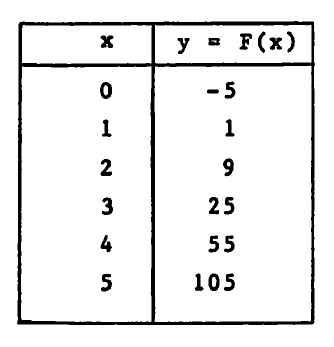

In [1]:
# Primero importamos las librerías
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Hacemos los datos de la tabla en dos arreglos
valores_x = np.array([0, 1, 2, 3, 4, 5]) # Valores de x de la tabla
valores_fx = np.array([-5, 1, 9, 25, 55, 105]) # Valores de f(x) de la tabla

In [26]:
# Calcular los coeficientes de diferencias divididas de Newton
n = len(valores_fx)  # Número de puntos en la tabla de datos
coeficientes = np.copy(valores_fx)  # Usamos np.copy para copiar un arreglo en otra variable, el arreglo se irá actualizando para almacenar las diferencias divididas
for j in range(1, n): # Creamos un bucle para controlar el orden de las primera diferencias, segundas, y asi sucesivamente
    for i in range(n - 1, j - 1, -1): # Creamos un bucle para controlar el orden de las diferencias divididas
        coeficientes[i] = (coeficientes[i] - coeficientes[i - 1]) / (valores_x[i] - valores_x[i - j]) # Por formula

In [27]:
# Evaluar el polinomio de Newton en un rango de valores para graficar
grafica_x = np.linspace(min(valores_x), max(valores_x), 100)  # Crea 100 puntos igualmente espaciados en el intervalo de los valores de x y nos da una serie de puntos donde evaluaremos el polinomio para obtener una grafica
grafica_fx = [] # Lista vacía donde guardamos los valores f(x) del polinomio interpolante
for xi in grafica_x:
    # Evaluar el polinomio en el punto xi
    p = coeficientes[-1] # Inicializamos p con el último coeficiente, que corresponde al término de mayor orden en el polinomio
    for k in range(1, n): # El ciclo utiliza el método de Horner para evaluar el polinomio de Newton
        p = coeficientes[n - k - 1] + (xi - valores_x[n - k - 1]) * p
    grafica_fx.append(p)

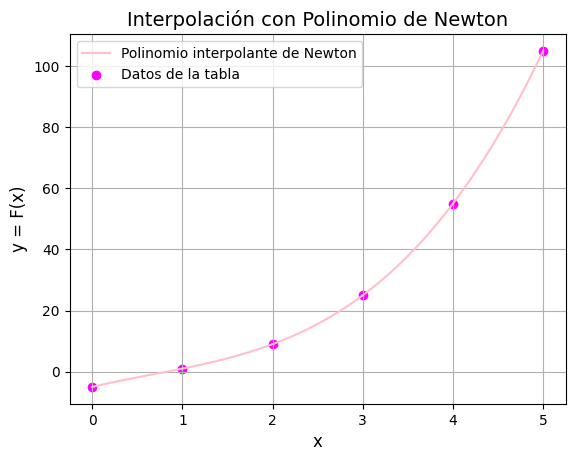

In [28]:
# Graficar los datos originales y el polinomio interpolante
plt.plot(grafica_x, grafica_fx, color='pink', label='Polinomio interpolante de Newton') # Graficamos el polinomio de Newton interpolado
plt.scatter(valores_x, valores_fx, color='magenta', label='Datos de la tabla') # Ocupamos .scatter para gráficar los puntos dados en la tabla
plt.xlabel('x', fontsize=12)
plt.ylabel('y = F(x)',fontsize=12)
plt.title('Interpolación con Polinomio de Newton', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Evaluación en un punto específico, se realiza el mismo proceso para el calculo del polinomio, solo que ahora con un punto que nosotros damos
x_eval = 1.5  # El 6.5 es un valor que se puede cambiar
fx_eval = coeficientes[-1]
for k in range(1, n):
    fx_eval = coeficientes[n - k - 1] + (x_eval - valores_x[n - k - 1]) * fx_eval
print(f"El valor interpolado en x = {x_eval} es y = {fx_eval}")

El valor interpolado en x = 1.5 es y = 4.375
